<h1 align="center">Logistic Regression</h1>

<br>

This tutorial is based on the book *An Introduction to Statistical Learning*, which is fully accessible online ([link](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf))

<h3 align="left">Overview of this tutorial on logistic regression</h3>


- Theory behind logistic regression


- Simple implementation of logistic regression for classification problems


- Performance Evaluation
    - Classification metrics
        - Accuracy
        - Precision (Positive Preditive Value, PPV)
        - Recall (sensitivity)
        - Specificity
    - ROC curves

Don't be confused by the use of the term "regression" here.
- **Logistic regression** is a **classification** algorithm designed to predict categorical target labels.

<br>

<h2 align="center">Theory behind (binary) logistic regression</h2>

A (binary) logistic regression is most often used to model dichotomous responses (the response variable can take only two values, 0 and 1). That is, if $\, y_1,..., y_n \,$ are independent random variables and $\, y_i \sim Bernoulli(\pi) \,$, then one can use a logistic regression to model the probability that $\, P(y = 1) = \pi \,$ versus $\, P(y = 0) = 1 - \pi, \,$ where $\, \pi \,$ is the probability of an observation $\, y_i \,$ belonging to class 1.

Logistic function (sigmoid function) maps any input value to a value between 0 and 1.

\begin{equation*}
    \large\sigma (x) = \frac{1}{1 \, + \, e^{-x}}.
\end{equation*}

Recall that the *linear regression* equation can be written as follows

<span style="font-size:larger">
\begin{align*}
\hat{y} &= \beta_0 x_0 \, + \, \beta_1 x_1 \, + \, ... \, + \, \beta_n x_n \\
&= \sum_{i=0}^{n} \beta_i x_i \: .
\end{align*}
<span>

When we plug this linear regression equation into the logistic function, we create a logistic regression: 

<span style="font-size:larger">
\begin{align*} 
\hat{y} &= \sigma \left(\sum_{i=0}^{n} \beta_i x_i \right) \\
&= \frac{1}{1 \, + \, e^{- \sum_{i=0}^{n} \beta_i x_i}}
\end{align*}
<span>

This presents a question, however. The chances are that if you are learning about logistic regression, that you have already learned about linear regression and how to interpret the results of a linear regression model.
- By substituting the linear regression equation into the logistic function, the resulting equation transforms the linear relationship into a logistic relationship.


- Since the **logarithmic scale is non-linear**, a $\beta$ coefficient value can't be directly linked to "one unit increase" as it could in linear regression. Something we can say, however, is that
    - A positive $\beta$ coefficient value indicates an increase in likelihood of belonging to class 1 with increase in the associated **x** feature.
    - A negative $\beta$ coefficient value indicates a decrease in likelihood of belonging to class 1 with increase in the associated **x** feature.



- We can't, however, say that the magnitude of the increase / decrease is the value of the $\beta$ coefficient (like in linear regression). 

    $\, \boldsymbol{\rightarrow} \,$ Instead, we can use **odds ratios**, essentially comparing magnitudes against each other.
    - Comparing magnitudes of coefficients against each other can lead to insight over which features have the strongest  effect on the prediction output.
    
I won't focus on explaining how to interpret the results of a logistic regression model in this tutorial, as I have already covered it extensively in several projects. If you want to learn how to interpret the results of a logistic regression model, you can refer to the link provided in one of my previous projects.
- https://github.com/HerraKaava/Python_Projects/blob/main/Generalized-Linear-Models-2/Demo05.ipynb (see **task 6**)

<br>

<br>

<h2 align="center">Logistic Regression with Scikit-Learn</h2>

<h3 align="left">Explanatory Data Analysis (EDA)</h3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/testi/Desktop/ML/DATA/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


- age: the age of participant in years
- physical_score: score achieved during physical exam (higher equals better)
- test_result: 0 = did not pass the hearing test, 1 = passed the hearing test

In [4]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [5]:
# Response variable
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

- The response variable is already dichotomous (it gets only two different values).
- This is what we want for a logistic regression.

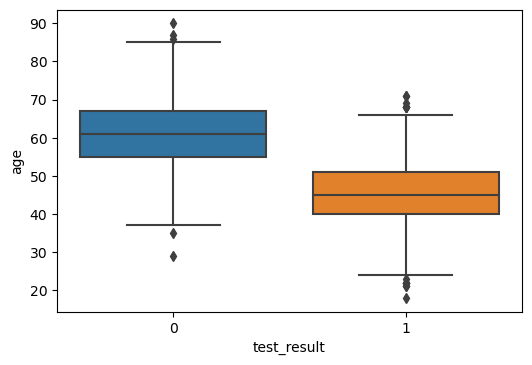

In [6]:
plt.figure(figsize=(6, 4), dpi=100)
sns.boxplot(x="test_result", y="age", data=df);

- Clearly people who do not pass the hearing test, tend to be older.
- This is somewhat intuitive, since aging affects hearing.

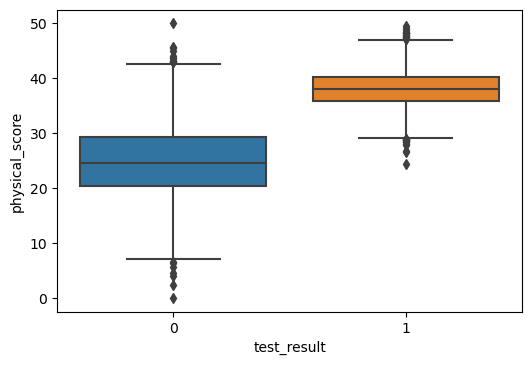

In [7]:
plt.figure(figsize=(6, 4), dpi=100)
sns.boxplot(x="test_result", y="physical_score", data=df);

- People that have a higher physical_score (i.e. better physical shape) tend to pass the hearing test more often than people with lower physical_score.

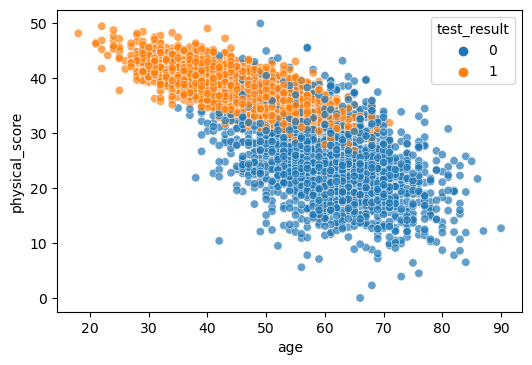

In [8]:
plt.figure(figsize=(6, 4), dpi=100)
sns.scatterplot(x="age", 
                y="physical_score", 
                hue="test_result",
                alpha=0.7,
                data=df);

- There seems to be a clear association with physical_score and age as well.
- Younger people tend to have better physical_score.

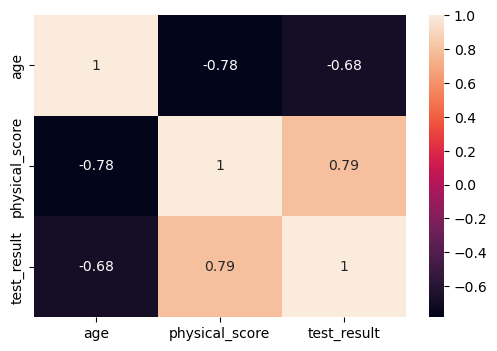

In [9]:
# Heat map to visualize the correlations between the variables
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(df.corr(), annot=True);

<br>

<h3 align="left">Training the Logistic Regression Model</h3>

In [10]:
# Features
X = df.drop("test_result", axis=1)

In [11]:
y = df["test_result"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=101)

In [14]:
scaler = StandardScaler()

In [15]:
# Fit the scaler to X_train
scaler.fit(X_train)

StandardScaler()

In [16]:
# Scale X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
# Create a logistic regression model
log_model = LogisticRegression()

In [18]:
# Fit to the training data
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [20]:
# Predict the label using the model.
# Recall that since we trained the model on scaled data, we also have to predict using scaled data.
y_pred = log_model.predict(scaled_X_test)

In [21]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

- Note that there are only zeros and ones here.
- This is because the model predicts the label to be either zero or one, as expected.

To predict the probabilities, you can use the predict.proba() method.

In [22]:
y_pred_proba = log_model.predict_proba(scaled_X_test)

In [23]:
y_pred_proba.shape

(500, 2)

In [24]:
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

- The first column contains the probability of the label $y_i$ belonging to the 0 class, and the second column contains the probability of the label $y_i$ belonging to 1 class.
- So each row contains the probability that a certain instance of the label y belongs to the 0 class and the probability that it belongs to the 1 class.
- Therefore, every row has to add up to 1 ($P(A) \, + \, P(A^c) = 1$).

In [25]:
# Calculate the sum of the sixth row (it should be 1)
y_pred_proba[5].sum()

1.0

<br>

<h2 align="center">Performance Evaluation</h2>

**Confusion Matrix**

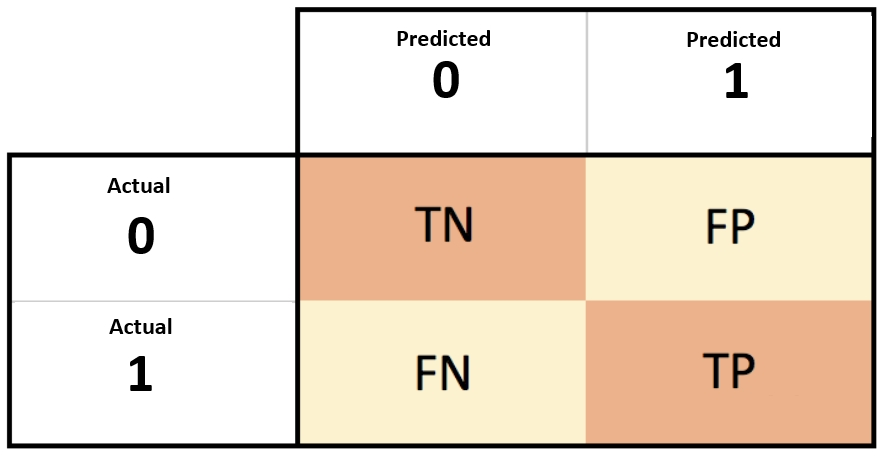

- If you are not familiar with confusion matrices, see the link below.
- https://en.wikipedia.org/wiki/Confusion_matrix

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

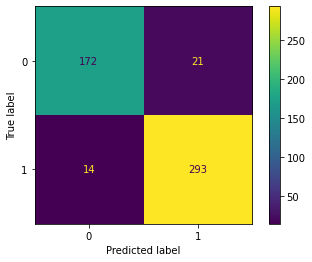

In [114]:
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot();

In [92]:
y_test.value_counts(ascending=True)

0    193
1    307
Name: test_result, dtype: int64

In [115]:
# Recall (sensitivity, true positive rate)
293 / (293+14)

0.9543973941368078

- $Recall = \frac{TP}{TP \, + \, FN}$
- TP (True Positives) represents the number of correctly predicted positive cases
- FN (False Negatives) represents the number of positive cases that were incorrectly predicted as negative.

In [116]:
# Specificity (true negative rate)
172 / (172+21)

0.8911917098445595

- $Specificity = \frac{TN}{TN + \, FP}$
- TN (True Negatives) represents the number of correctly predicted negative cases
- FP (False Positives) represents the number of negative cases that were incorrectly predicted as positive.

In [118]:
# Precision (Positive Predictive Value, PPV)
293 / (293 + 21)

0.9331210191082803

- $PPV = \frac{TP}{TP \, + \, FP}$

In [119]:
# Accuracy
(172+293) / 500

0.93

- $Accuracy = \frac{TP \, + \, TN}{TP \, + \, TN \, + \, FP \, + \, FN}$


- Accuracy, however, has its flaws. Check the wikipedia article below.
- https://en.wikipedia.org/wiki/Accuracy_paradox

Since these performance metrics are so widely used, Scikit-Learn actually has a function that calculates precision, recall, and F1-score, all at once (for each class).

- F1-Score is the **harmonic mean** of *precision* and *recall*:

\begin{align*}
F1 &= \frac{2}{\frac{1}{precision}\, + \, \frac{1}{recall}} \\
\\
&= \frac{2}{\frac{recall \, + \, precision}{precision \, * \, recall}} \\
\\
&= 2 * \frac{precision \, * \, recall}{recall \, + \, precision}
\end{align*}

In [81]:
from sklearn.metrics import classification_report

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



- Support tells you how many specific instances you had of each class (see value_counts below)

In [153]:
y_test.value_counts(ascending=True)

0    193
1    307
Name: test_result, dtype: int64

<br>

<h3 align="left">ROC Curve, Precision-Recall Curve</h3>

- The **ROC curve** is created by plotting the **true positive rate (TPR)** against the **false positive rate (FPR)** at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity)

In [150]:
from sklearn.metrics import RocCurveDisplay

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

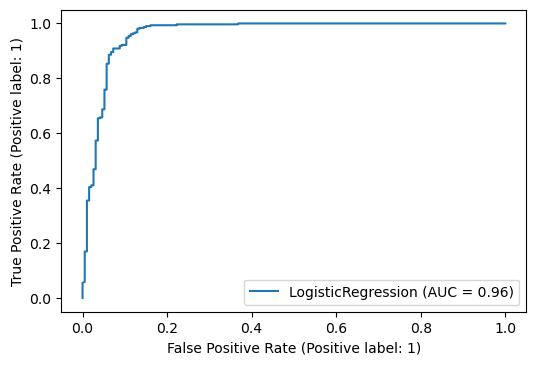

In [151]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
RocCurveDisplay.from_estimator(log_model, 
                               scaled_X_test, 
                               y_test,
                               ax=ax);